# **WEEK2_PROJECT**

---



---
## Data Preprocessing , Model training and Evaluation


## **1 . Data Preprocessing**

---



---



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load raw AQI data
raw_data_path = '/content/raw_aqi_data.csv'
df = pd.read_csv(raw_data_path)

In [3]:
# Drop rows with missing target labels
df = df[df['AQI_Bucket'].notna()]

In [4]:
# Fill missing numeric values with column-wise mean
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].apply(lambda x: x.fillna(x.mean()))

In [5]:
# Convert 'Date' to datetime and extract 'Year' and 'Month'
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [6]:
# Encode categorical columns
encoders = {}
categorical_cols = ['AQI_Bucket', 'City', 'Station']
for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        encoders[col] = le  # Save encoders if needed later

In [7]:
# Save processed data
processed_data_path = '../data/processed_aqi.csv'

import os
# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(processed_data_path), exist_ok=True)

df.to_csv(processed_data_path, index=False)

## **2. Model Training**

---



---



In [8]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [9]:
# Load processed data
data_path = '../data/processed_aqi.csv'
df = pd.read_csv(data_path)

In [10]:
# Define target and features
target_col = 'AQI_Bucket'
drop_cols = ['Date']
feature_cols = df.columns.difference([target_col] + drop_cols)
X = df[feature_cols]
y = df[target_col]

In [11]:
# Scale features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [12]:
# Split data into training and testing sets (stratified)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [13]:
# Initialize and train Random Forest model
rf_clf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,             # Use all CPU cores (optional improvement)
    verbose=0              # Change to 1 for training progress
)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

# **3. Evaluation**

---



---



In [14]:
# Import libraries
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# Evaluate accuracy (optional)
from sklearn.metrics import accuracy_score
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 1.00


In [16]:
# Predict on test data
y_pred = rf_clf.predict(X_test)

In [17]:
# Print classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n")
print(report)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       268
           1       1.00      1.00      1.00      1766
           2       1.00      1.00      1.00       556
           3       1.00      1.00      1.00      1645
           4       1.00      1.00      1.00       268
           5       1.00      1.00      1.00       467

    accuracy                           1.00      4970
   macro avg       1.00      1.00      1.00      4970
weighted avg       1.00      1.00      1.00      4970



In [18]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

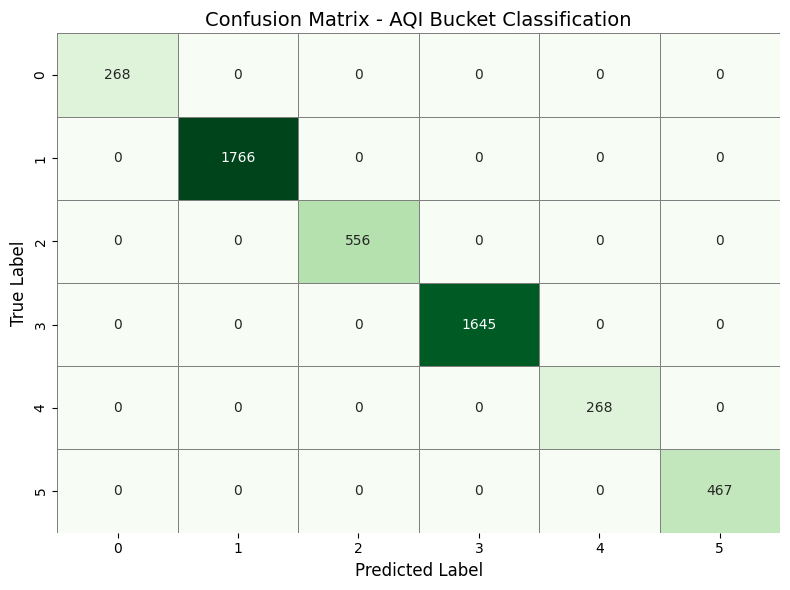

In [24]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', cbar=False,
            linewidths=0.5, linecolor='gray')
plt.title("Confusion Matrix - AQI Bucket Classification", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.tight_layout()
plt.show()